## Modules and utilities

In [423]:
from utilities import *
import numpy as np
import os
import re
import pandas as pd
from scipy import signal
from scipy import interpolate
from scipy import fft
import matplotlib.pyplot as plt
%matplotlib inline



In [732]:
def getforcefiles(dirpath):
    csv_list = []
    for root, dirs, files in os.walk(dirpath):
        for name in files:
            if name.endswith('txt'):
                filename = os.path.join(root, name)
                csv_list.append(filename)
    return csv_list

def importforces(path):
    df = pd.read_csv(path, sep='\t',header=None, names=colnames)
    df['FX_sum'] = df['FX_9504'] + df['FX_9505']
    df['FY_sum'] = df['FY_9504'] + df['FY_9505']
    df['FZ_sum'] = df['FZ_9504'] + df['FZ_9505']
    df['time']=df.index
    return df

def ezplot(df,which=None,save=False):
    fig, ax=plt.subplots( nrows=1, ncols=1 )
    if 'time' in df:
        df.plot.line(x='time',y='FX_sum', ax=ax, lw=0.5, color='red')
        df.plot.line(x='time',y='FY_sum', ax=ax, lw=0.5, color='green')
        df.plot.line(x='time',y='FZ_sum', ax=ax, lw=0.5, color='blue')
    else:
        df.reset_index().plot.line(x='ATI_time',y='FX_sum', ax=ax, lw=0.5, color='red')
        df.reset_index().plot.line(x='ATI_time',y='FY_sum', ax=ax, lw=0.5, color='green')
        df.reset_index().plot.line(x='ATI_time',y='FZ_sum', ax=ax, lw=0.5, color='blue')
    plt.show()
    if save==True:
        wd=os.path.dirname(which)
        title='plot_'+os.path.basename(which).split(".")[0]
        fig.savefig(fname=wd+'/'+title+'.png')
    plt.close(fig)
    return ax

## Import in vivo log

In [733]:
log_path = '/Users/phil/Desktop/rotoscoping/InVivoLog-apr19.csv'
log = pd.read_csv(log_path, index_col=0)

## Calculate plate resonant frequency
result: 142-150Hz

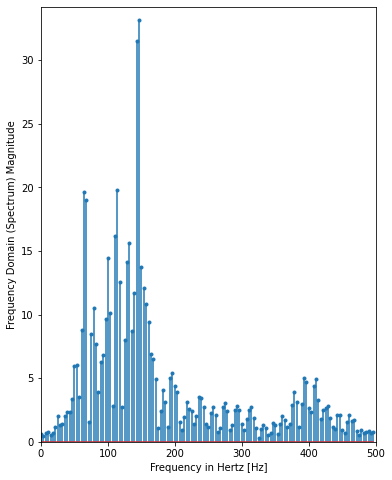

146.42857142857144


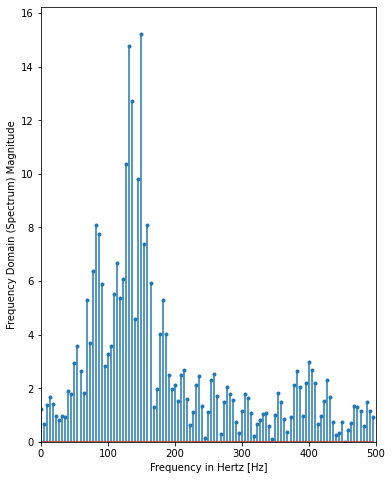

150.0


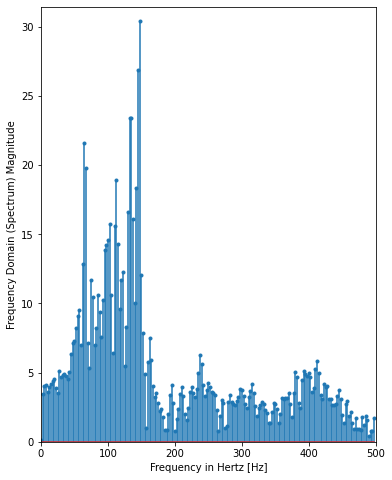

147.5


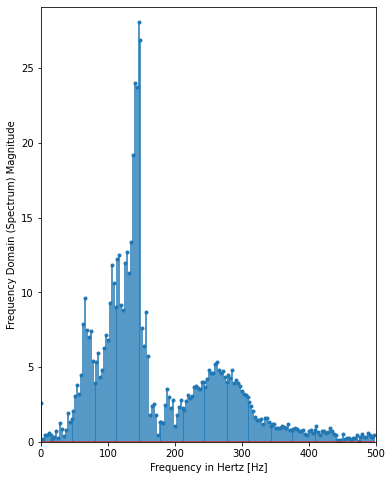

145.71428571428572


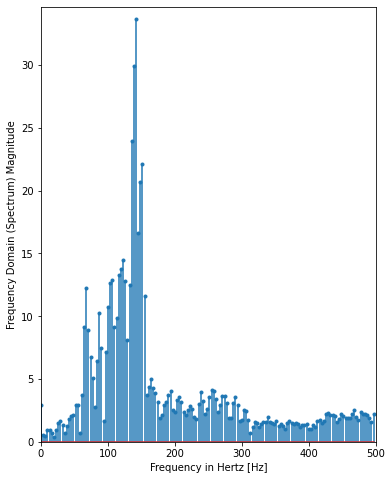

141.93548387096774


In [734]:
sampling_freq = 1000
test_path = '/Users/phil/Desktop/rotoscoping/forceplate/data-sep27-2019/outside_plate_tap_test.txt'
rf_df = importforces(test_path)
tap_one = rf_df.iloc[2120:2400]
tap_two = rf_df.iloc[2780:3000]
tap_three = rf_df.iloc[3400:3800]
tap_four = rf_df.iloc[11250:11600]
tap_five = rf_df.iloc[12190:12500]

def calc_fft(data, sampling_freq):
    X = fft.fft(np.array(data))
    freqs = fft.fftfreq(len(data))*sampling_freq
    fig, ax = plt.subplots(figsize=(6,8))
    ax.stem(freqs, np.abs(X),markerfmt='.')
    ax.set_xlabel('Frequency in Hertz [Hz]')
    ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
    ax.set_xlim(0, sampling_freq /2)
    ax.set_ylim(0, np.abs(X).max()+1)
    plt.show()
    return(freqs[np.abs(X).argmax()])

for tap in [tap_one,tap_two,tap_three,tap_four,tap_five]:
    freq = calc_fft(tap['FZ_sum'],sampling_freq)
    print(freq)

## Grab GRF data

In [735]:
csv_dir = '/Users/phil/Desktop/rotoscoping/forceplate'
colnames = ['FX_9504','FY_9504','FZ_9504','TX_9504','TY_9504','TZ_9504',
            'FX_9505','FY_9505','FZ_9505','TX_9505','TY_9505','TZ_9505']

csv_list = getforcefiles(csv_dir)
csv_dict = {
    '21_t2_fullstride_A':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct7-2019/21.txt',
    '20_t3_fullstride_A':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct7-2019/20.txt',
    '12_t1_fullstride_A':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct7-2019/12.txt',
    '23_t3_fullstride_A':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct7-2019/23.txt',
    '9_t4_fullstride_A':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct7-2019/9.txt',
    '9_p3_fullstride_A-':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct9-2019/9.txt',
    '14_p1_fullstride_A-':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct9-2019/14.txt',
    '3_p2_fullstride_a-':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct14-2019/3.txt',
    '8_p4_fullstride_a':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct14-2019/8.txt',
    '9_p2_squeeze_A+':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct16-2019/9.txt',
    '2_t2_squeeze_A-':'/Users/phil/Desktop/rotoscoping/forceplate/data-oct23-2019/2.txt',
    '5_t1_squeeze_A+':'/Users/phil/Desktop/rotoscoping/forceplate/data-nov1-2019/5.txt',
    '6_t4_squeeze_A-':'/Users/phil/Desktop/rotoscoping/forceplate/data-nov1-2019/6.txt',
    '3_p4_squeezelow_A':'/Users/phil/Desktop/rotoscoping/forceplate/data-nov6-2019/3.txt',
    '9_p3_squeezelow_A':'/Users/phil/Desktop/rotoscoping/forceplate/data-nov6-2019/9.txt',
    '12_p1_squeezelow_A':'/Users/phil/Desktop/rotoscoping/forceplate/data-nov6-2019/12.txt',
    '2_p3_stand':'/Users/phil/Desktop/rotoscoping/forceplate/data-feb3-2020/2.txt',
    '3_p1_stand':'/Users/phil/Desktop/rotoscoping/forceplate/data-feb3-2020/3.txt',
    '11_t1_stand':'/Users/phil/Desktop/rotoscoping/forceplate/data-feb3-2020/11.txt',
    '12_t2_stand':'/Users/phil/Desktop/rotoscoping/forceplate/data-feb3-2020/12.txt',
    '13_t2_stand':'/Users/phil/Desktop/rotoscoping/forceplate/data-feb3-2020/13.txt',
}
for trial in csv_dict.keys():
    csv_dict[trial] = importforces(csv_dict[trial]).drop(['time'],axis=1)
force_df = pd.concat(csv_dict, names=['Run ID','ATI_time'])

## Normalize by BW

In [736]:
norm_force_df = force_df.copy()
for trial in csv_dict.keys():
    norm_force_df.loc[pd.IndexSlice[trial,:],:]/=log.loc[trial,'Mass (kg)']

## Find sync peaks

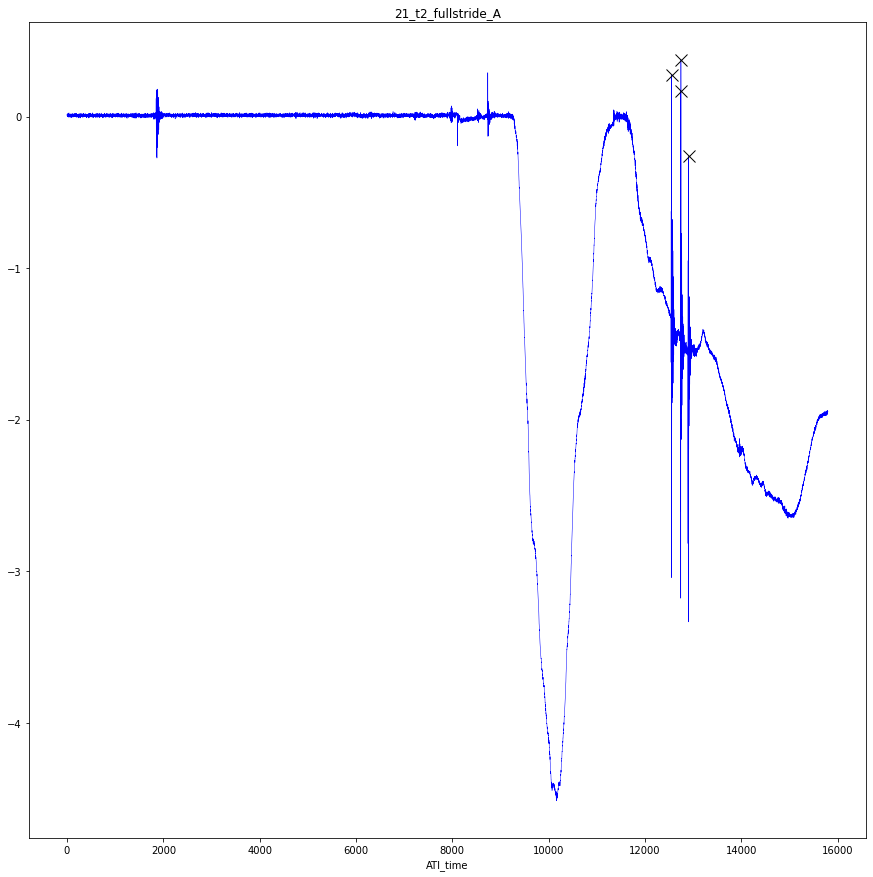

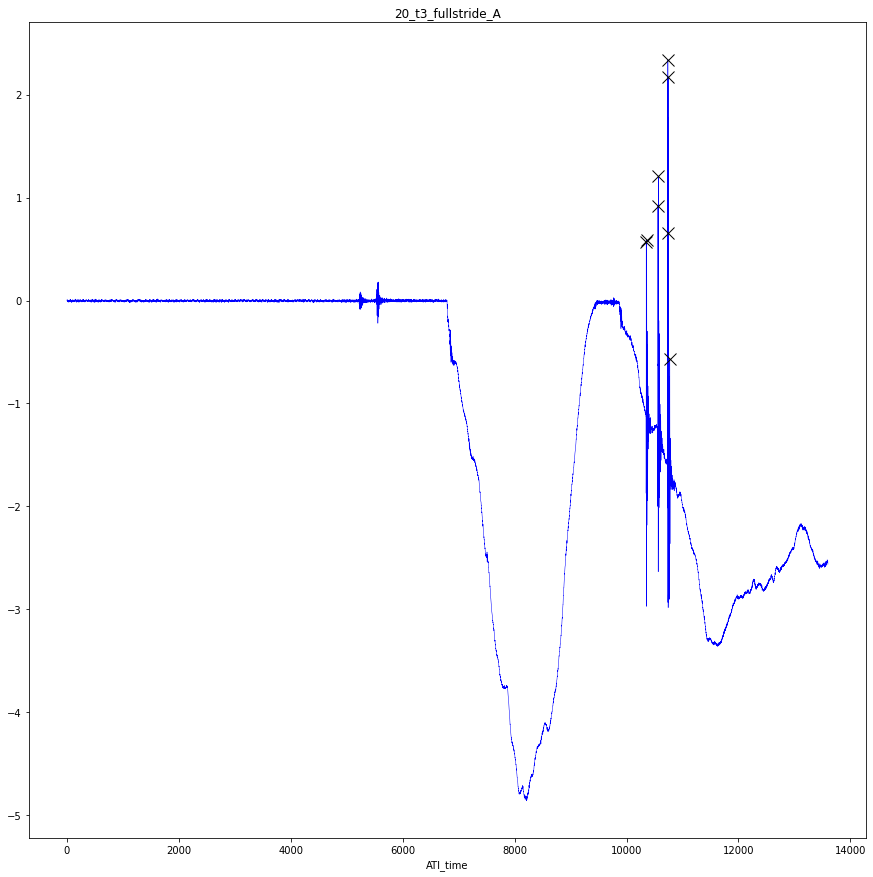

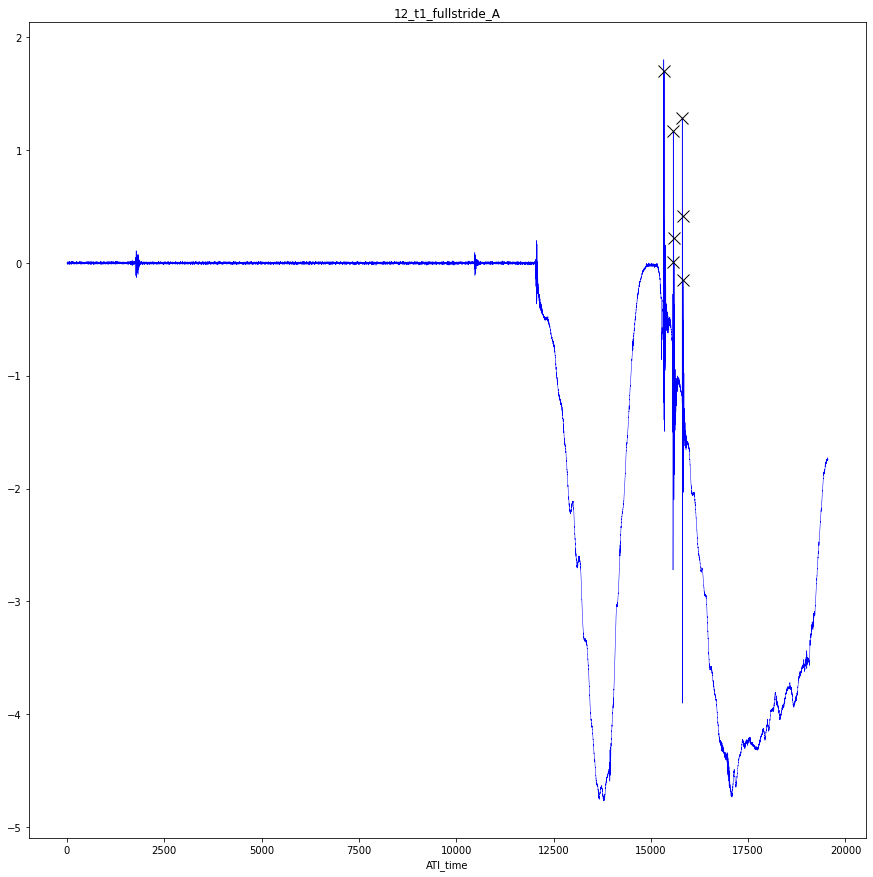

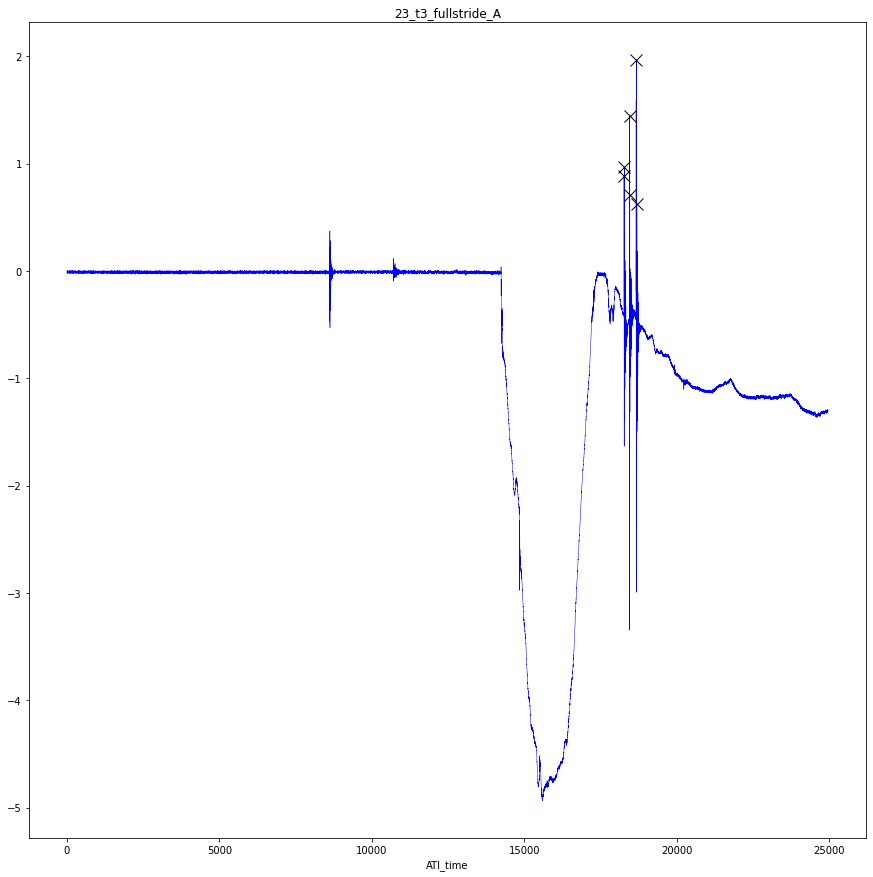

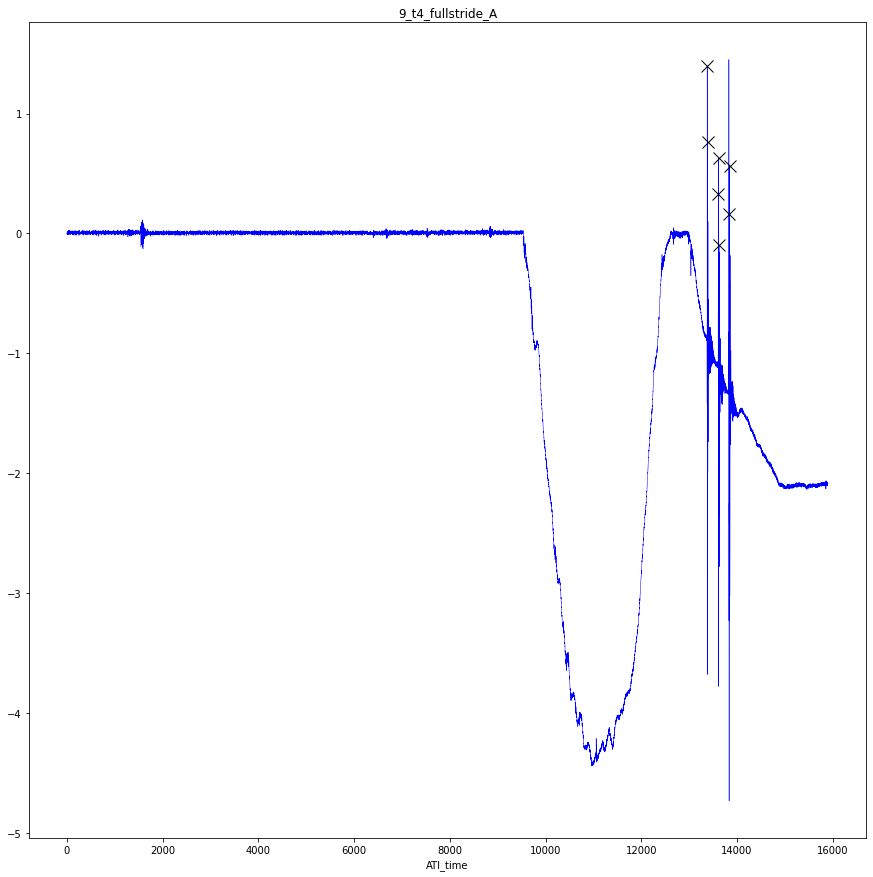

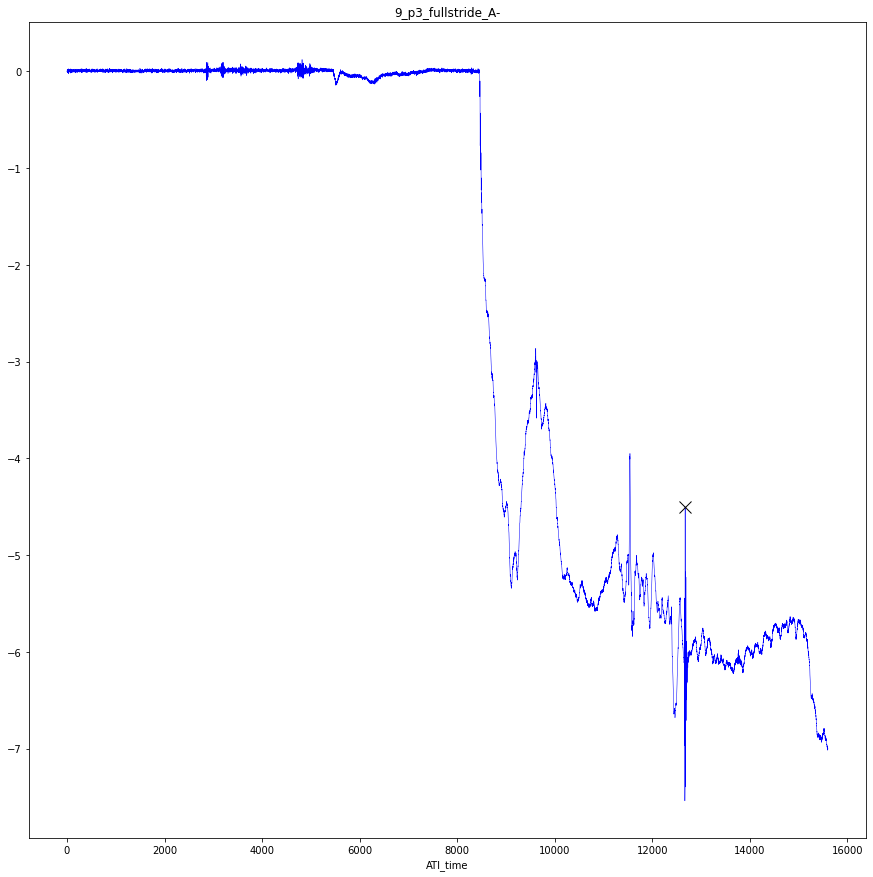

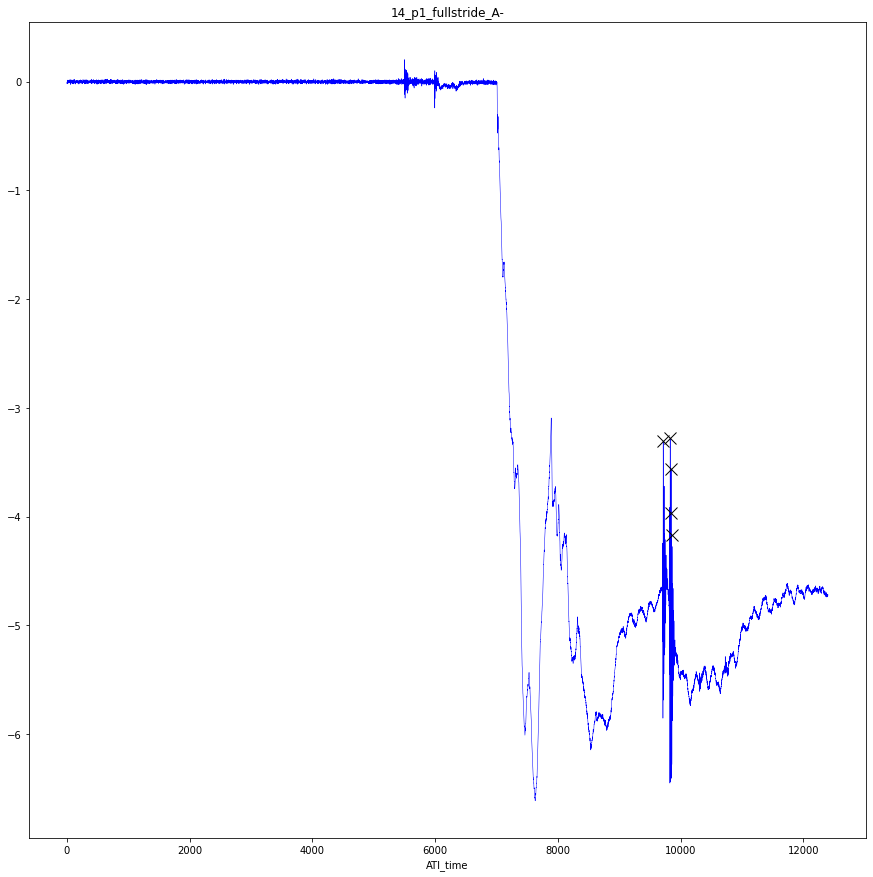

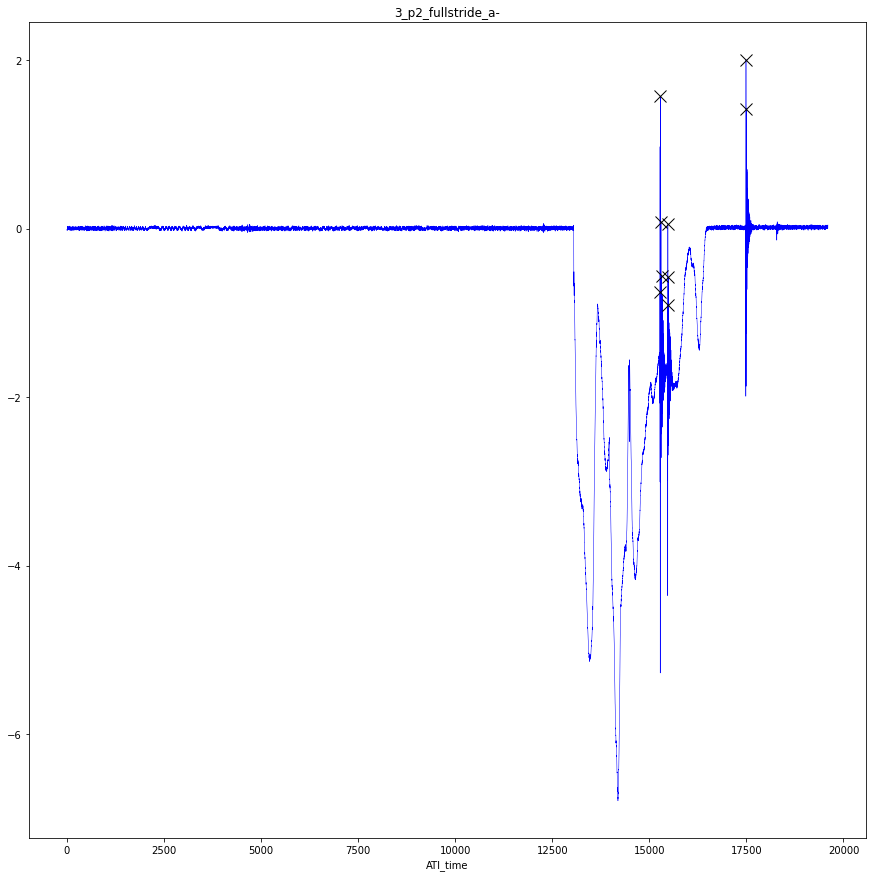

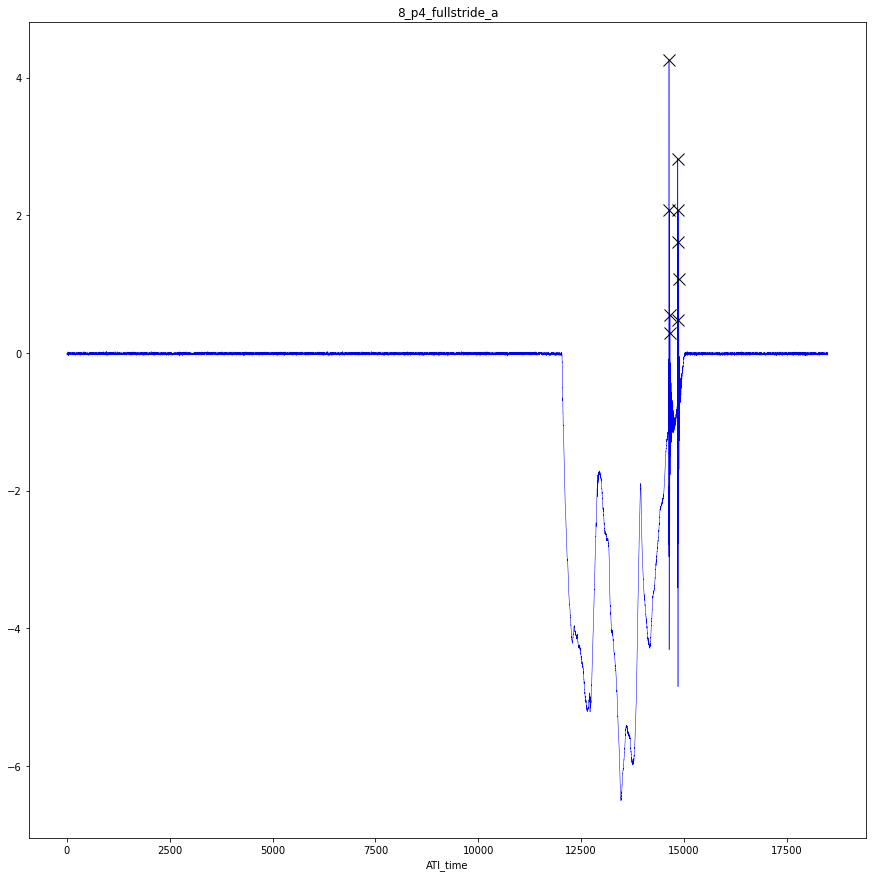

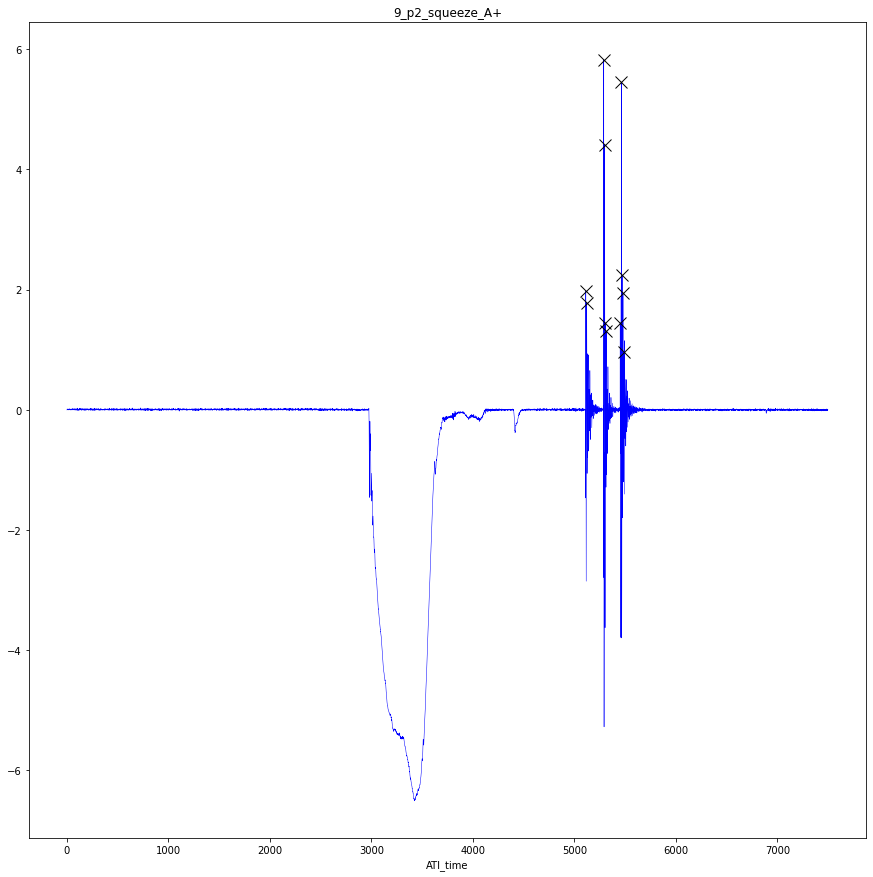

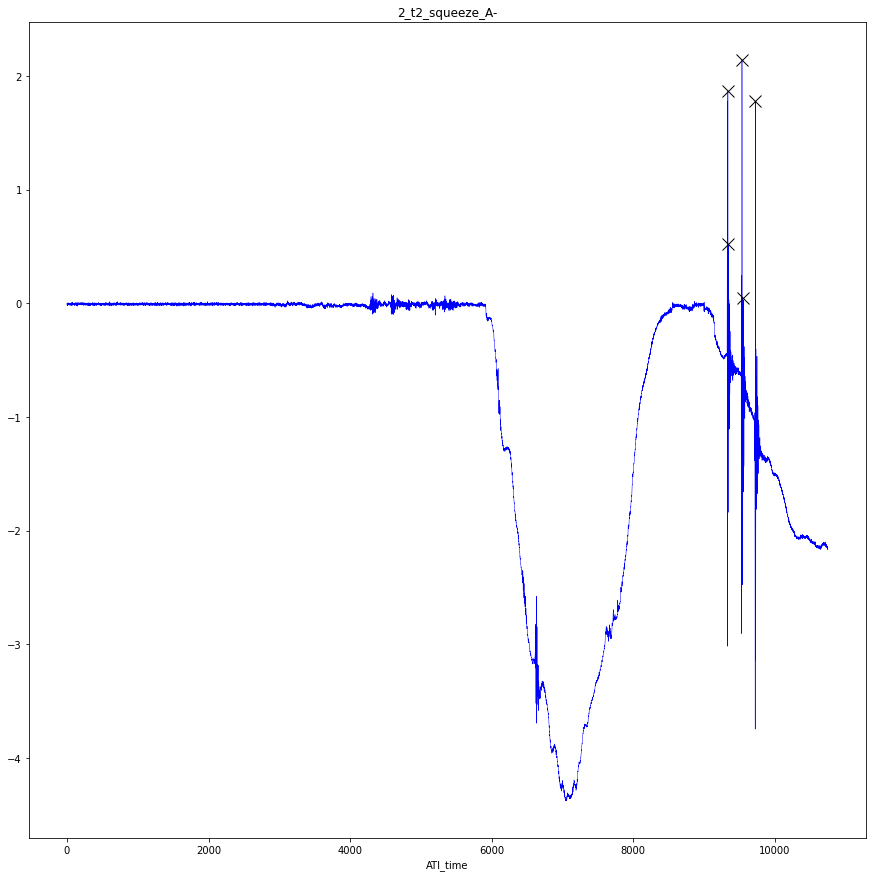

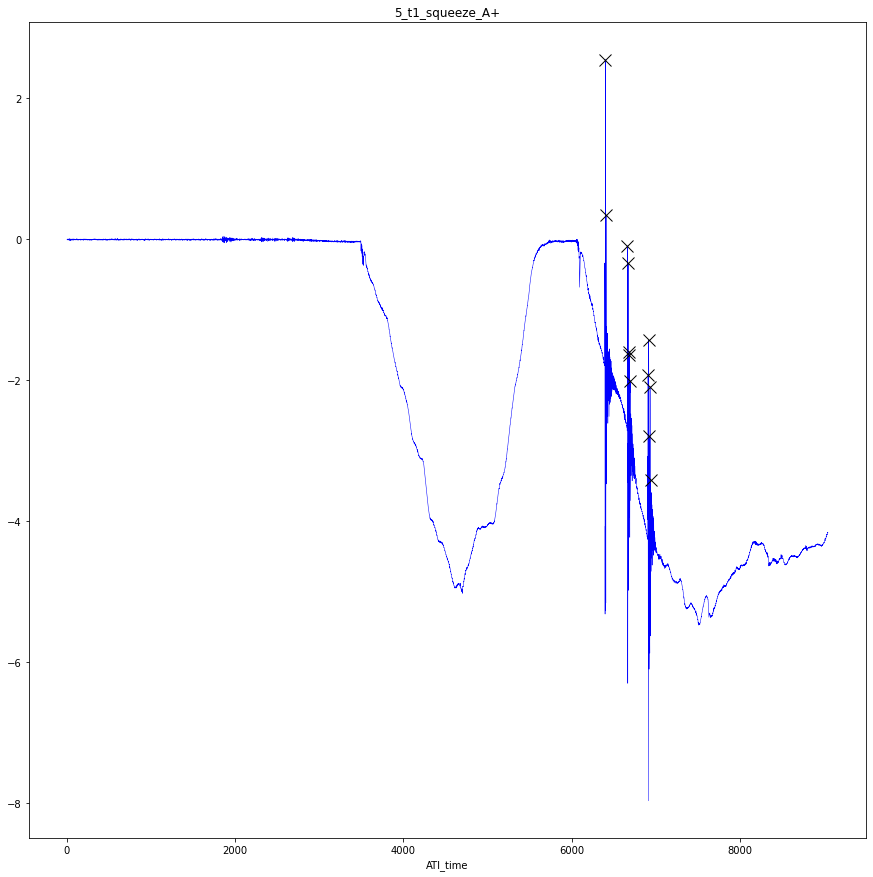

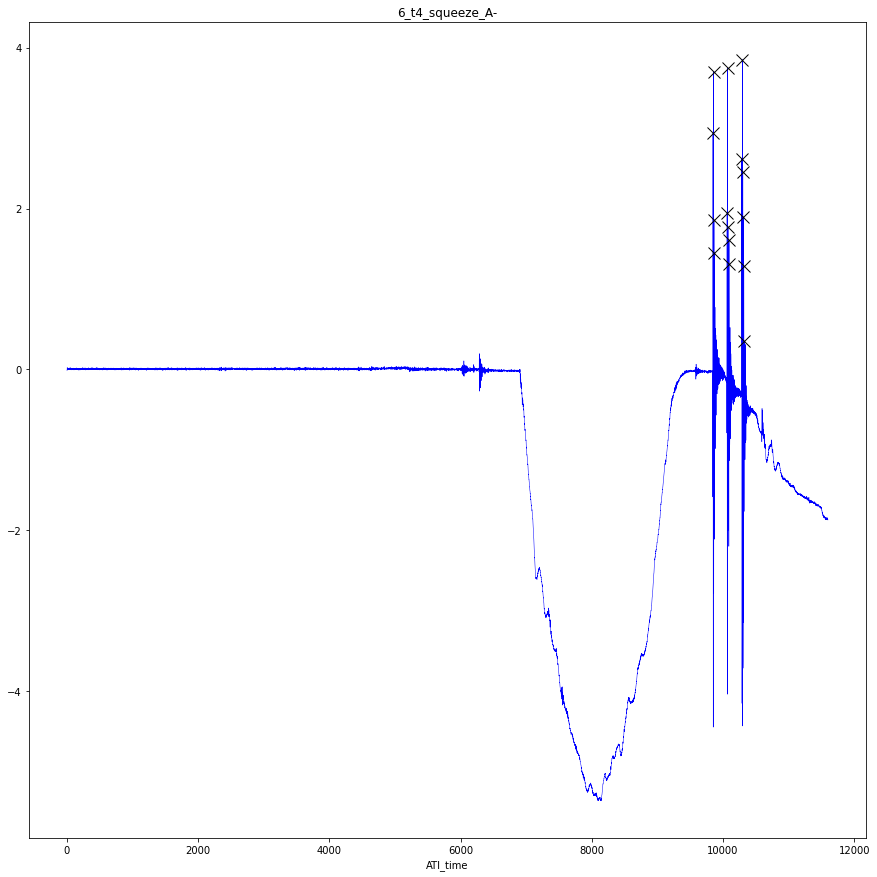

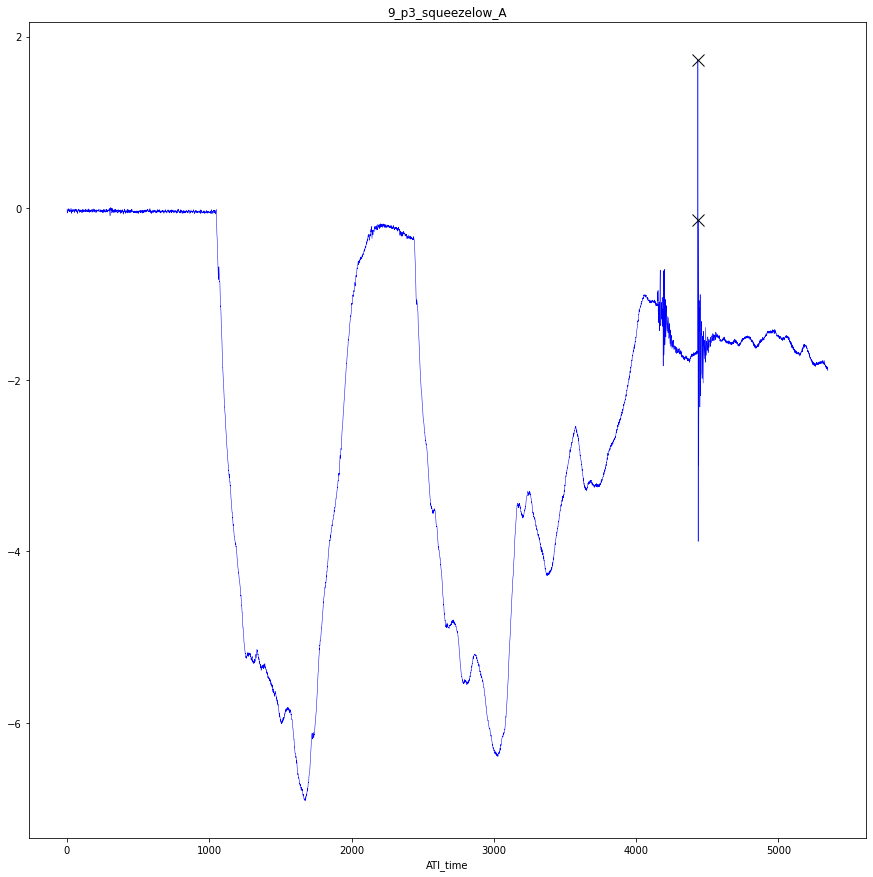

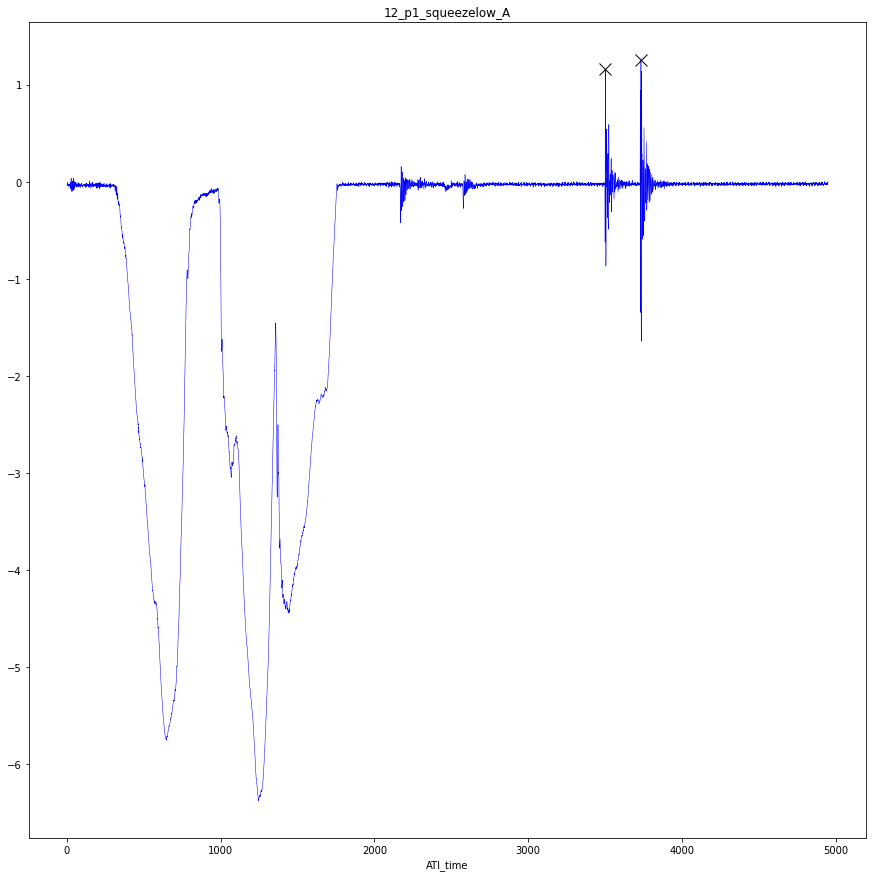

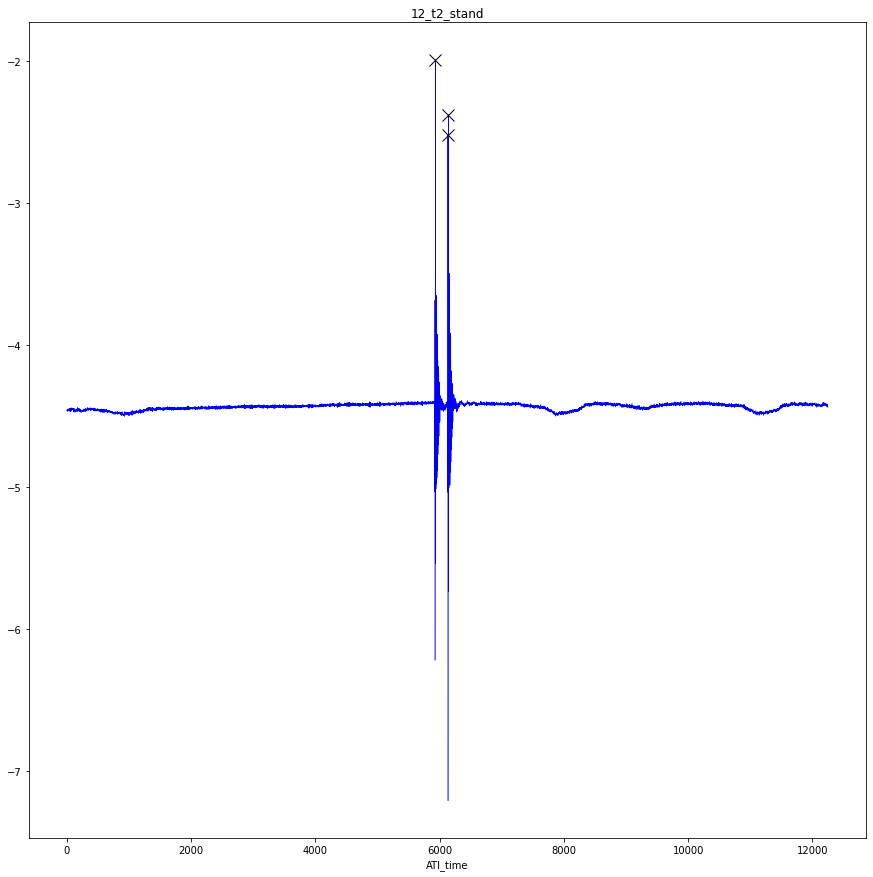

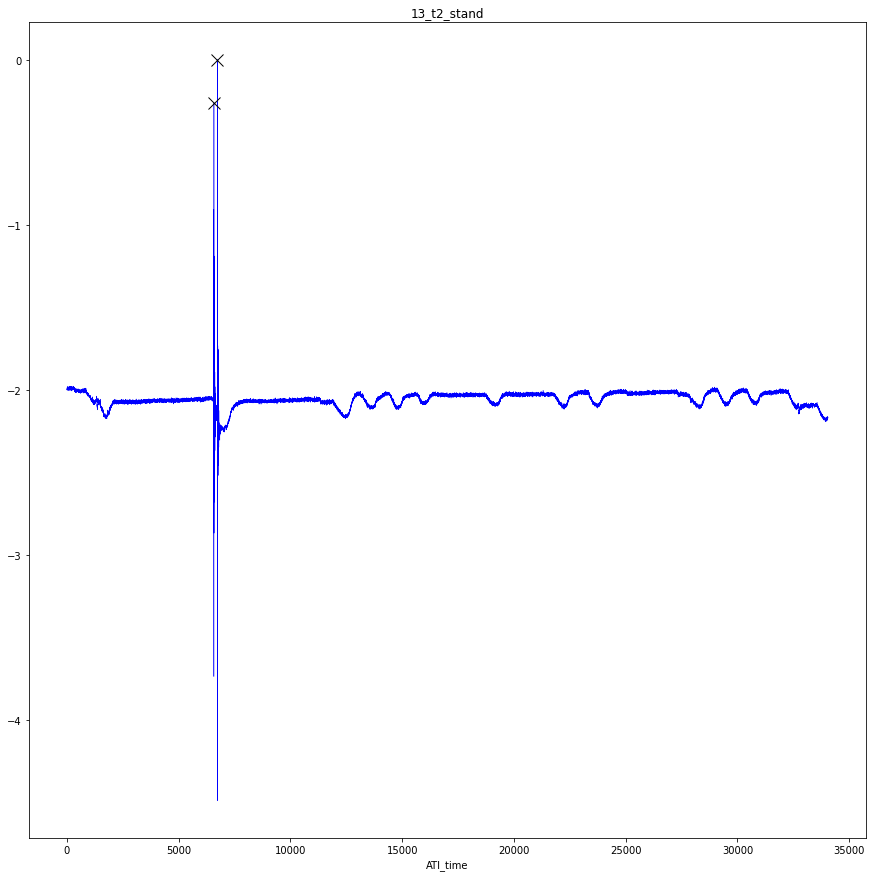

In [737]:
skip_crop = ['3_p4_squeezelow_A', '2_p3_stand','3_p1_stand', '11_t1_stand']
for trial_id in csv_dict.keys():
    if not trial_id in skip_crop:
        zData = norm_force_df.loc[trial_id,'FZ_sum']
        peaks, _ = signal.find_peaks(zData, prominence=2, distance=1, width=(1,10))
        log.loc[trial_id,'force_sync'] = peaks[0]
        fig, ax=plt.subplots( figsize=(15,15) )
        zData.plot.line(x='time',y='FZ_sum', ax=ax, lw=0.5, color='blue')
        ax.plot(peaks, zData[peaks],"x", markersize=12, color="black")
        ax.set_title(trial_id)
        plt.show()

## low-pass butterworth filter

#### choose filter cutoff

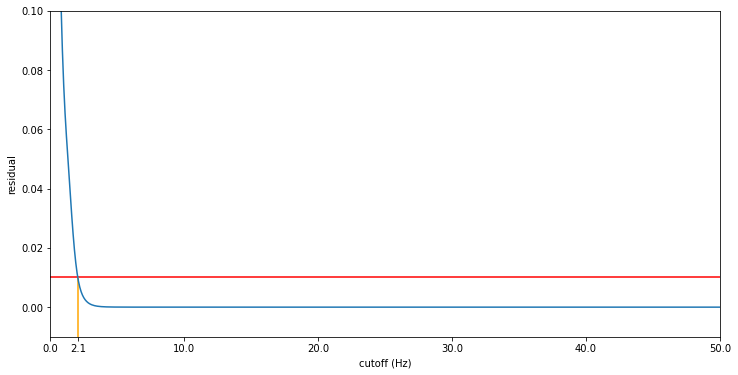

In [738]:
test_trial = '21_t2_fullstride_A'
sampling_f = log.loc[test_trial,'ATI sampling (Hz)']
test_range = np.arange(0.1, 50.1, 0.1)
baseline = norm_force_df.loc[test_trial,'FZ_sum'][0:1000]

def find_noise(baseline):
    rms = np.sqrt(np.mean(baseline**2))
    return rms

def make_butter(data, cutoff, sampling_f):
    b, a = signal.butter(4, cutoff, btype='lowpass', fs=sampling_f)
    y = signal.filtfilt(b, a, data)
    return y

def get_residual(data, cutoff, sampling_f):
    ys = make_butter(data, cutoff, sampling_f)
    residual = math.sqrt(np.mean((data-ys)**2))
    return residual

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

noise_floor = find_noise(baseline)
residuals = [get_residual(forces_filt['FZ_sum'], cutoff, sampling_f) for cutoff in test_range]
critical_residual, cf_idx = find_nearest(residuals, noise_floor)
opt_cutoff = test_range[cf_idx]

fig,ax = plt.subplots(figsize=(12,6))
ax.plot(test_range, residuals)
ax.hlines(noise_floor, 0, test_range.max(), colors='red')
ax.vlines(opt_cutoff, -0.01, noise_floor, colors='orange')
ax.set_ylim([-0.01, 0.1])
ax.set_xlim([0, test_range.max()])
ax.set_ylabel('residual')
ax.set_xlabel('cutoff (Hz)')
ax.set_xticks([0,opt_cutoff,10,20,30,40,50])

#### apply filter

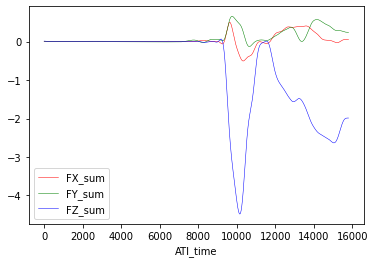

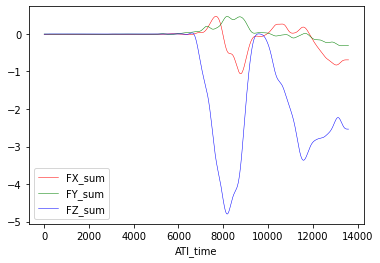

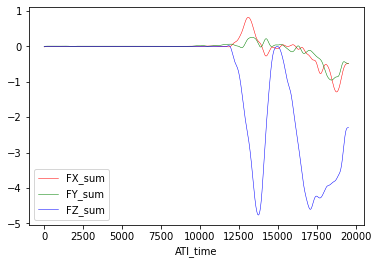

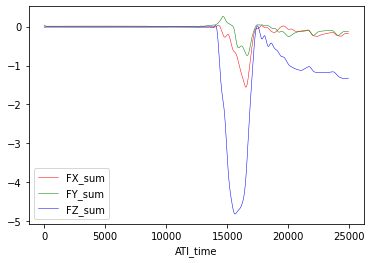

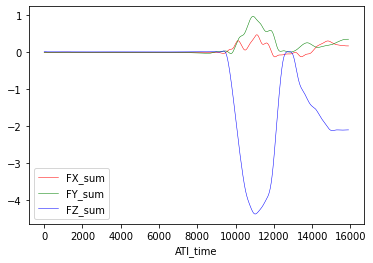

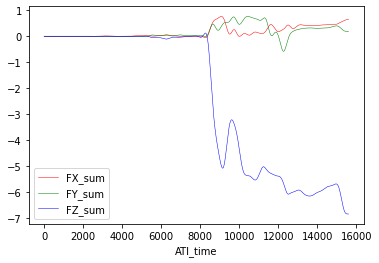

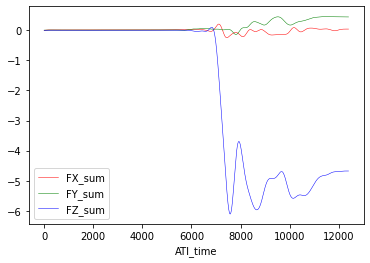

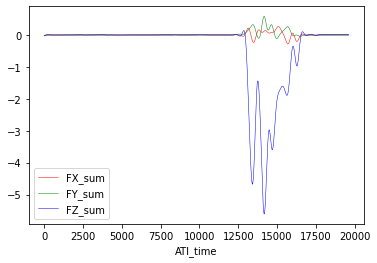

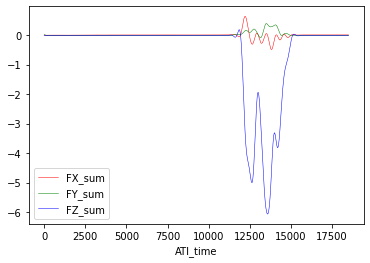

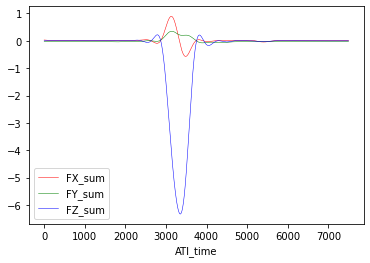

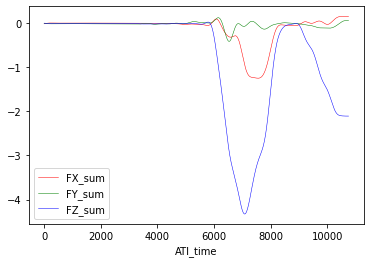

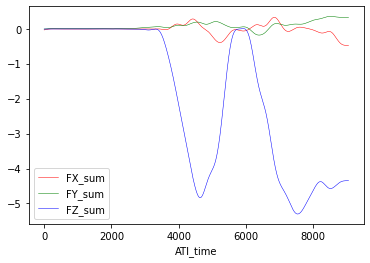

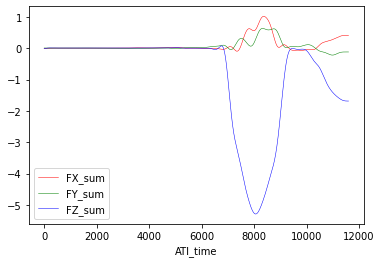

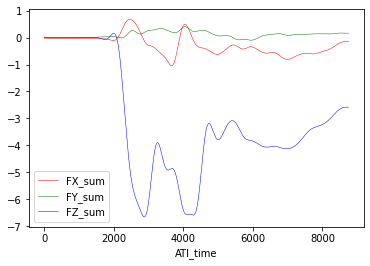

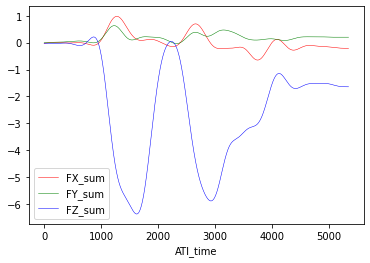

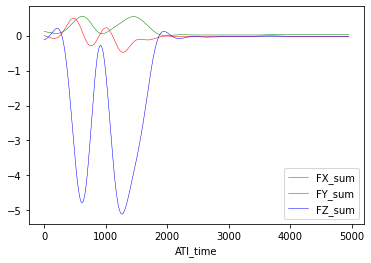

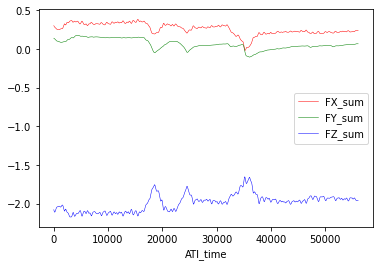

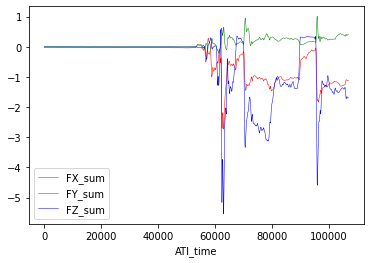

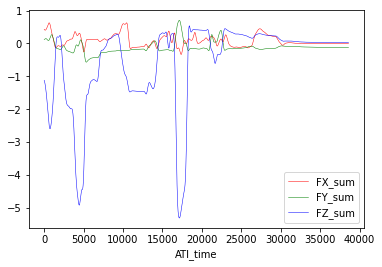

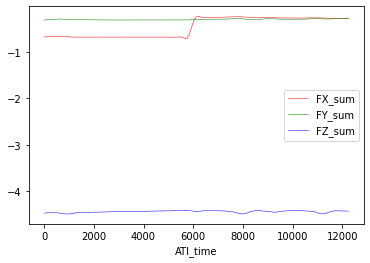

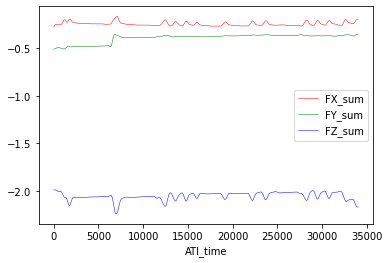

In [739]:
filt_norm_force_df = norm_force_df.copy()
for trial_id in csv_dict.keys():
    sampling_f = log.loc[trial_id,'ATI sampling (Hz)']
    filt_norm_force_df.loc[trial_id,'FX_sum'] = make_butter(filt_norm_force_df.loc[trial_id,'FX_sum'], opt_cutoff, sampling_f)
    filt_norm_force_df.loc[trial_id,'FY_sum'] = make_butter(filt_norm_force_df.loc[trial_id,'FY_sum'], opt_cutoff, sampling_f)
    filt_norm_force_df.loc[trial_id,'FZ_sum'] = make_butter(filt_norm_force_df.loc[trial_id,'FZ_sum'], opt_cutoff, sampling_f)
    ezplot(filt_norm_force_df.loc[trial_id])

In [740]:
# deprecated...quintic spline interpolation following gosnell
# forces_interp = forces_bwNorm.copy()
# smoothing_param = 20
# splX = interpolate.UnivariateSpline(forces_interp['time'], forces_interp['FX_sum'], k=5, s=smoothing_param)
# splY = interpolate.UnivariateSpline(forces_interp['time'], forces_interp['FY_sum'], k=5, s=smoothing_param)
# splZ = interpolate.UnivariateSpline(forces_interp['time'], forces_interp['FZ_sum'], k=5, s=smoothing_param)
# xs = np.linspace(0, len(forces_interp), len(forces_interp))

# forces_interp['FX_sum'] = splX(xs)
# forces_interp['FY_sum'] = splY(xs)
# forces_interp['FZ_sum'] = splZ(xs)

## Crop force data to first tap

In [741]:
cropped_force_df = filt_norm_force_df.copy()
for trial_id in csv_dict.keys():
    sync_time = log.loc[trial_id,'force_sync']
    if not np.isnan(sync_time):
        sync_time_int = math.floor(sync_time)
        cropped_force_df.drop(cropped_force_df.loc[(trial_id,sync_time_int):(trial_id,)].index, inplace=True)

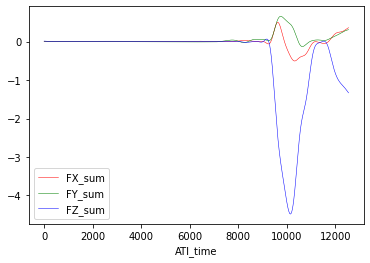

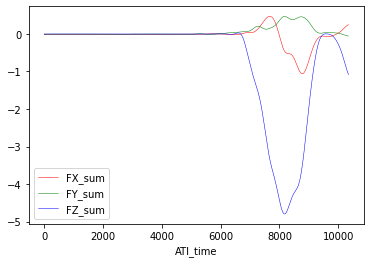

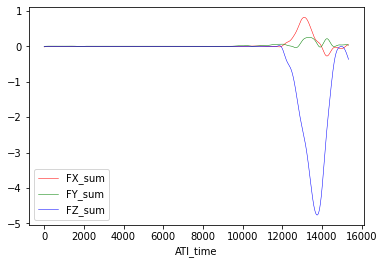

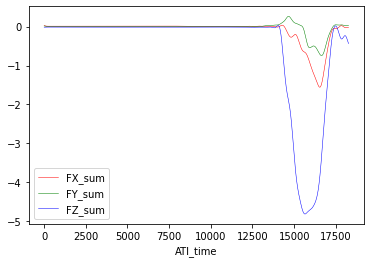

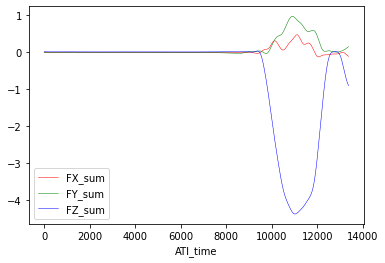

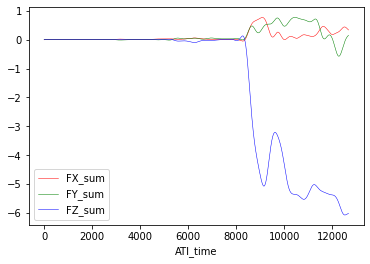

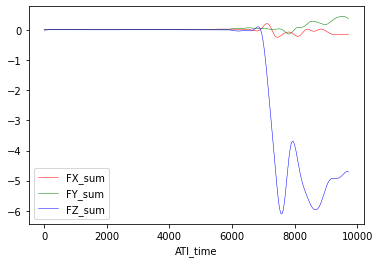

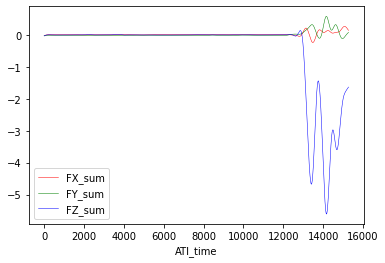

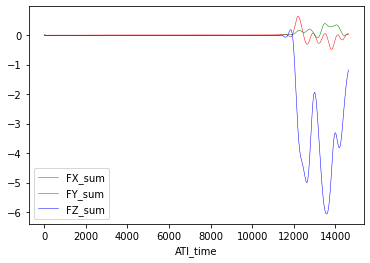

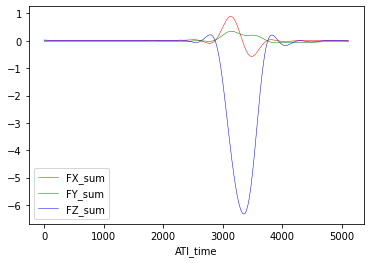

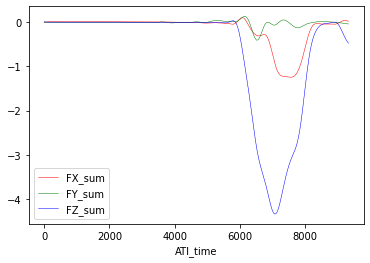

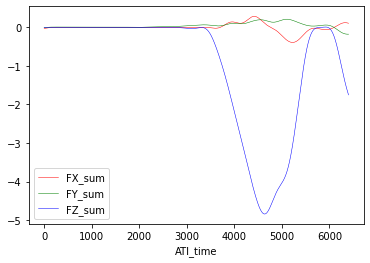

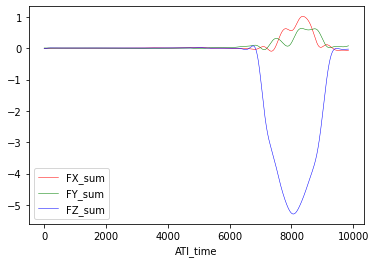

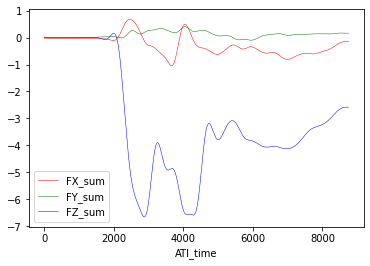

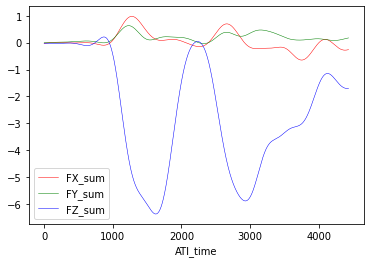

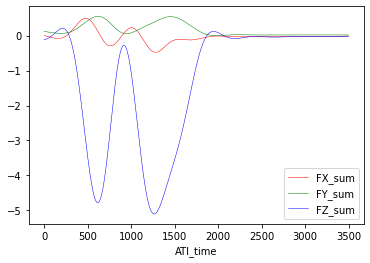

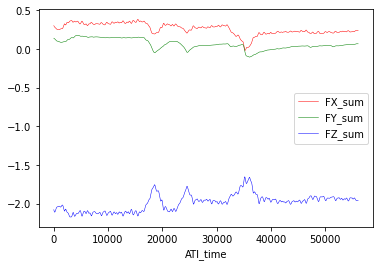

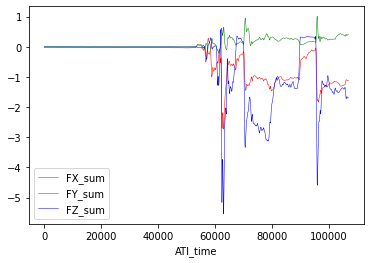

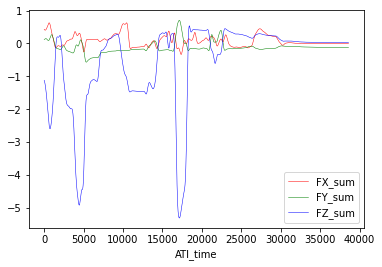

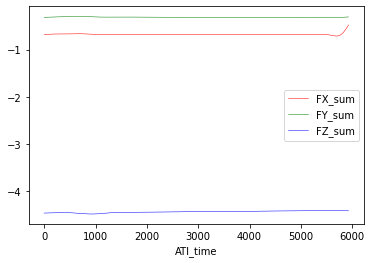

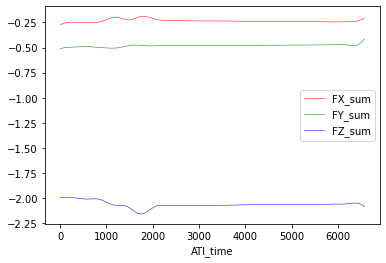

In [742]:
for trial_id in csv_dict.keys():
    ezplot(cropped_force_df.loc[trial_id])

## Resample to XROMM framerate

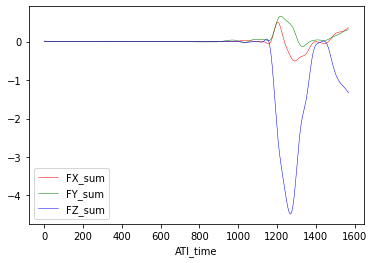

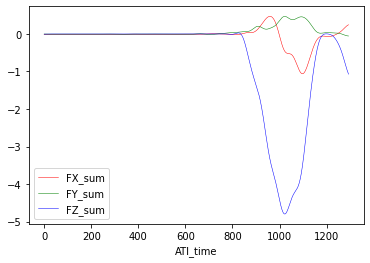

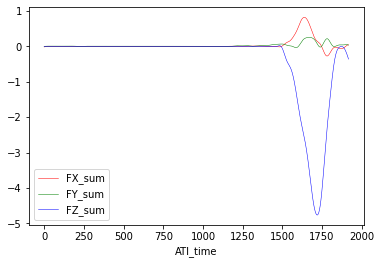

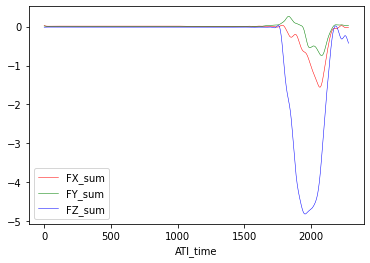

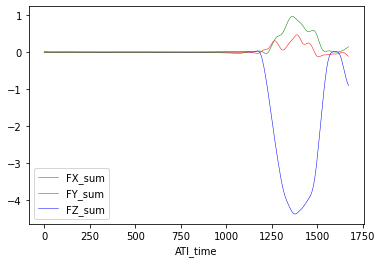

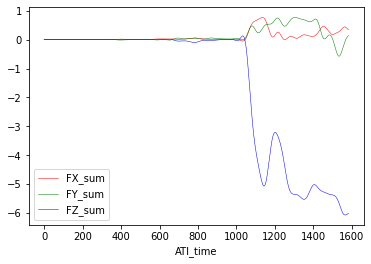

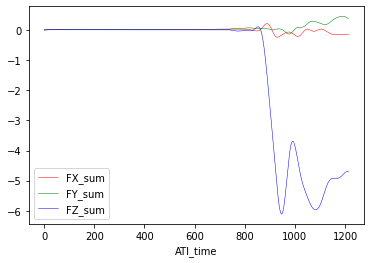

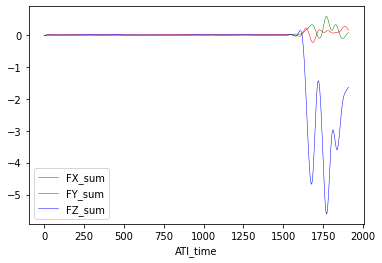

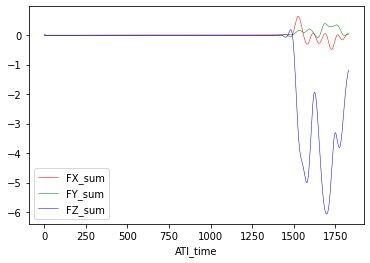

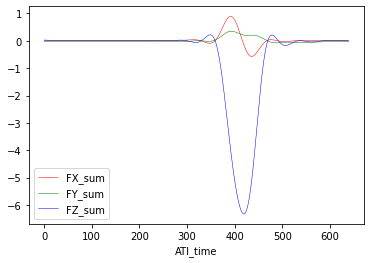

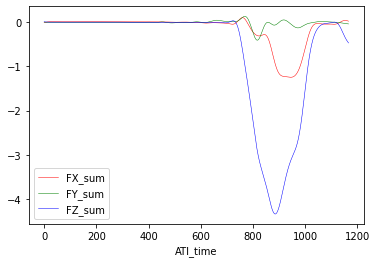

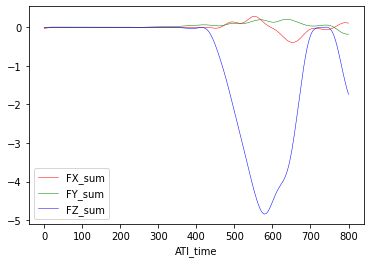

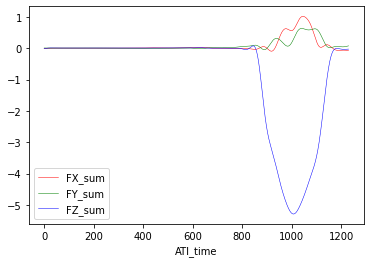

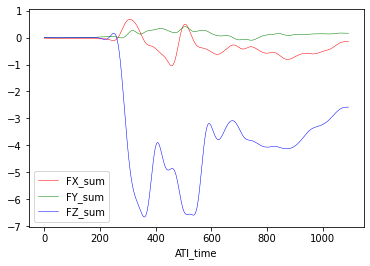

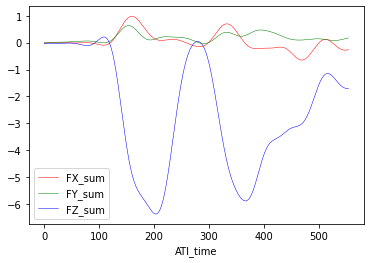

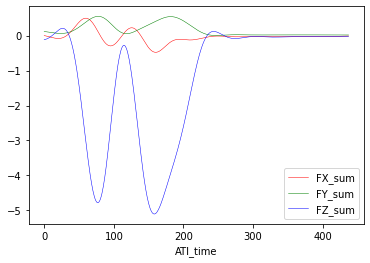

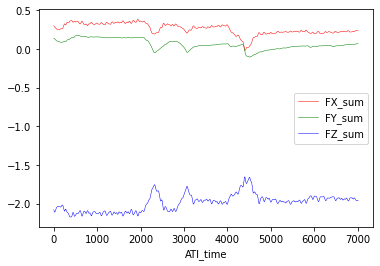

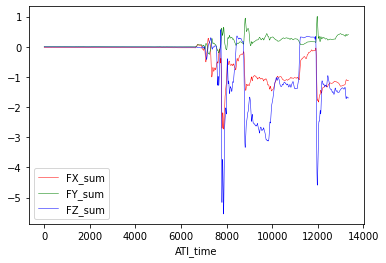

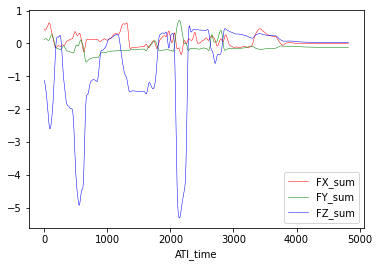

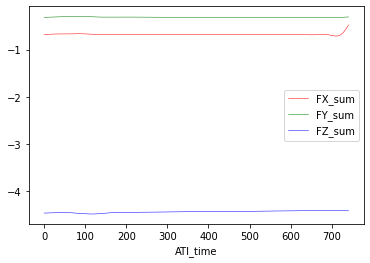

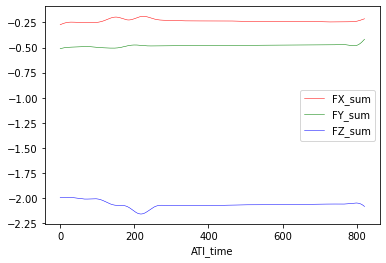

In [891]:
resampled_force_df = cropped_force_df.copy()
sort_order = list(csv_dict.keys())
resampled_force_df.index = resampled_force_df.index.set_levels(pd.to_timedelta(resampled_force_df.index.levels[1], unit='ms'), level=1)
resampled_force_df = resampled_force_df.groupby(level=0).apply(lambda x: x.reset_index(level=0,drop=True).resample(rule='8L').asfreq())
resampled_force_df.index = resampled_force_df.index.set_levels(pd.to_numeric(resampled_force_df.index.levels[1]), level=1)
resampled_force_df.index = resampled_force_df.index.set_levels(resampled_force_df.index.levels[1]/8000000, level=1)
resampled_force_df.index = resampled_force_df.index.set_levels(pd.to_numeric(resampled_force_df.index.levels[1],downcast='integer'), level=1)
resampled_force_df.reindex(sort_order, level=0)
for trial_id in csv_dict.keys():
    ezplot(resampled_force_df.loc[trial_id])

## Save out processed force data

In [922]:
out_dir = '/Users/phil/Desktop/rotoscoping/processed-forces-apr21'
export_force_df = resampled_force_df.loc[:,['FX_sum','FY_sum','FZ_sum']]
export_force_df.loc[:,['FX_sum','FZ_sum']] *= -1 #xromm scenes are LR flipped, reverse polarity of Z and X to get reaction force but leave ML (Y) as is
export_force_df.index.set_names(['trial','frame'], inplace=True)
export_force_df.columns = ['FX','FY','FZ']
for trial_id in csv_dict.keys():
    out_path = os.path.join(out_dir,trial_id+'.csv')
    ex_df = export_force_df.loc[trial_id]
    ex_df.to_csv(out_path)